## dit is het 3e bestand van testing

In [205]:
#import needed libraries
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample


In [206]:
#import data
data_raw = pd.read_csv('tested_molecules.csv')
data_raw

,SMILES,PKM2_inhibition,ERK2_inhibition
0,C=C(C)c1nc(N)nc(N)n1,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0
...,...,...,...
1111,O=C1c2ccccc2[C@H](Nc2ccc3c(c2)OCCO3)N1Cc1ccco1,0,1
1112,O=S(=O)(Nc1cccc(-c2cn3ccsc3[nH+]2)c1)c1ccc(F)cc1,0,1
1113,Oc1c(C[NH+]2CCN(c3ccccn3)CC2)cc(Cl)c2cccnc12,0,1
1114,c1ccc(-c2csc(N3CCN(c4ccccn4)CC3)n2)cc1,0,1


In [207]:
# Create dataframe
from main import create_dataframe

expanded_df = create_dataframe(data_raw)
expanded_df.head()

,SMILES,PKM2_inhibition,ERK2_inhibition,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,C=C(C)c1nc(N)nc(N)n1,0,0,5.313889,5.313889,0.120833,0.120833,0.592228,9.545455,151.173,...,0,0,0,0,0,0,0,0,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0,11.238954,11.238954,0.225308,-0.366756,0.785414,10.470588,250.681,...,0,0,0,0,0,0,0,0,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0,11.090706,11.090706,0.049610,-0.049610,0.581062,9.066667,210.277,...,0,0,0,0,0,0,0,0,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0,11.892238,11.892238,0.076632,-0.457824,0.441090,10.411765,232.239,...,0,0,0,0,0,0,0,0,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0,11.693580,11.693580,0.012315,-0.498260,0.720343,9.933333,226.663,...,0,0,0,0,0,0,0,0,0,0


In [208]:
# data binair maken



In [209]:
# Delete PKM2_inhibition and ERK2_inhibition, as these are labels solely necessary for training the model
expanded_df_binair = expanded_df.drop(columns = ['PKM2_inhibition','ERK2_inhibition'])





In [210]:
# # Functie om te checken of een kolom alleen discrete data bevat
# def is_discrete(col):
#     # Controleer of de kolom numeriek is
#     if pd.api.types.is_numeric_dtype(col):
#         # Controleer of alle niet-NaN waarden gehele getallen zijn
#         return all(col.dropna().apply(lambda x: float(x).is_integer()))
#     return False

# # Functie om kolommen te binariseren
# def binarize_column(col):
#     return col.apply(lambda x: 1 if x != 0 else 0)

# # Check en binariseer kolommen indien van toepassing
# for column in expanded_df_binair.columns:
#     if is_discrete(expanded_df_binair[column]):
#         expanded_df_binair[column] = binarize_column(expanded_df_binair[column])

# print(expanded_df_binair)

# # plotten van min-max scaled values
# plt.figure(figsize=(40, 12))
# expanded_df.boxplot(rot=90)
# plt.title('Boxplot van elke variabele')
# plt.ylabel('Waarden (min-max geschaald)')
# plt.xlabel('Variabelen')
# plt.show()

In [211]:
# checken of we geen missing values hebben
nan_counts = expanded_df_binair.columns[expanded_df_binair.isnull().any()].tolist()

# checken of er lijsten zijn die enkel dezelfde waarde bevat
non_variating_columns = expanded_df_binair.columns[expanded_df_binair.nunique()==1].tolist()

# omdat de hele lijst geen variatie vertoont verwijderen we hem want dan kan er op basis van deze variabelen ook geen onderscheid worden gemaakt tussen de moleculen
expanded_df_binair.drop(columns = non_variating_columns, inplace = True)
expanded_df_binair.describe()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,...,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,11.755641,11.755641,0.163540,-1.049675,0.684839,15.241012,347.818473,328.200409,347.458997,127.992832,...,0.167563,0.164875,0.187276,0.156810,0.021505,0.042115,0.048387,0.077061,0.097670,0.051971
std,2.232314,2.232314,0.183773,1.534098,0.148925,5.621078,71.906315,68.148378,71.829989,26.927705,...,0.403645,0.392375,0.414815,0.380651,0.151180,0.213912,0.222878,0.276708,0.390876,0.226071
min,3.295899,3.295899,0.000269,-6.846394,0.243857,9.066667,151.173000,142.101000,151.085795,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.862167,11.862167,0.046637,-1.242713,0.581350,11.113324,295.335500,278.281750,295.047004,108.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.412161,12.412161,0.105302,-0.404874,0.700589,14.273504,348.316500,328.242000,347.625500,128.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.892687,12.892687,0.205572,-0.123116,0.803140,17.368908,401.547500,378.322250,401.220656,146.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.950036,14.950036,1.101853,1.101853,0.945352,72.187500,592.649000,556.361000,592.253314,228.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000


In [212]:
# checken of het normaal verdeelde variabelen zijn

# Functie om kolommen te testen op normaal verdeeldheid
def check_normality(df):
    normality_results = {}
    for column in df.columns:
        stat, p_value = shapiro(df[column].dropna())  # dropna om NaN-waarden te verwijderen
        normality_results[column] = p_value
    return normality_results

# Controleren op normaal verdeeldheid
normality_results = check_normality(expanded_df_binair.iloc[:,1:])

# Print resultaten
for column, p_value in normality_results.items():
    if p_value > 0.05:
        print(f"Kolom {column} is normaal verdeeld (p-waarde = {p_value:.5f})")
print('Done')

# geen enkele variabele is dus normaal verdeeld --> standard scaling is naar onze mening dus geen goed idee, wij zouden voor min-max gaan

scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(expanded_df.iloc[:,1:])
scaled_df = pd.DataFrame(scaled_array, columns=expanded_df.iloc[:,1:].columns)

# Weergeven van de geschaalde DataFrame
scaled_df.describe()

# scaled_df heeft niet meer de SMILES erin staan

Done


,PKM2_inhibition,ERK2_inhibition,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,...,1116.000000,1116.000000,1116.000000,1116.0,1116.000000,1116.000000,1116.0,1116.000000,1116.000000,1116.000000
mean,0.025090,0.045699,0.725900,0.725900,0.148215,0.729308,0.628632,0.097818,0.445427,0.449233,...,0.093638,0.078405,0.010753,0.0,0.021057,0.024194,0.0,0.038530,0.032557,0.025986
std,0.156467,0.208925,0.191547,0.191547,0.166826,0.193011,0.212297,0.089053,0.162877,0.164506,...,0.207407,0.190326,0.075590,0.0,0.106956,0.111439,0.0,0.138354,0.130292,0.113036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.735041,0.735041,0.042092,0.705021,0.481105,0.032424,0.326547,0.328733,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.782234,0.782234,0.095347,0.810433,0.651084,0.082490,0.446555,0.449334,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.823466,0.823466,0.186371,0.845882,0.797273,0.131529,0.567130,0.570225,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [213]:
# Perform PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

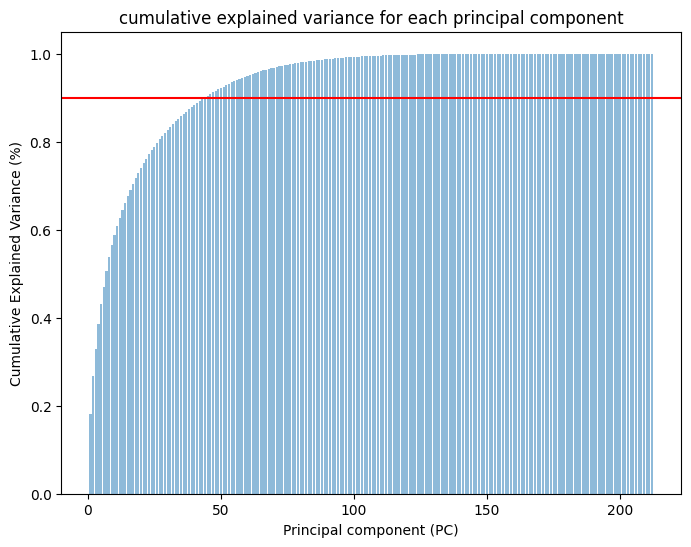

In [214]:
# MinMaxScaler

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cumulative_variance) + 1), cumulative_variance, alpha=0.5, align='center')

plt.axhline(y=0.9,color='r',linestyle='-')
plt.xlabel('Principal component (PC)')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('cumulative explained variance for each principal component')

plt.show()

In [215]:
# Nummer of Principal Components bij MinMaxScaling
num_components = np.argmax(cumulative_variance >= 0.80) + 1
print(num_components)

27


In [216]:
## GEEFT DE TOP 4 BELANGRIJSKTE FEATURES VOOR DE EERSTE 26 PCs

# Apply PCA with the desired number of components
pca = PCA(n_components=num_components)
pca.fit(scaled_df)

# Extract loadings
loadings = pca.components_.T

# Create a DataFrame for better visualization
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(num_components)], index=scaled_df.columns)

# # Print the loadings
# print("Loadings for the first 26 Principal Components:")
# print(loadings_df)

# Determine the most important features for each principal component
top_features = loadings_df.apply(lambda x: x.abs().nlargest(4).index, axis=0)
print("\nMost important features for each of the first 26 principal components:")
print(top_features)


Most important features for each of the first 26 principal components:
              PC1                      PC2             PC3          PC4  \
0      ExactMolWt  NumAromaticHeterocycles  BCUT2D_LOGPLOW  BCUT2D_MRHI   
1           MolWt                  fr_Ar_N     EState_VSA4  SlogP_VSA11   
2  HeavyAtomMolWt         NumAromaticRings     EState_VSA6  BCUT2D_MWHI   
3       LabuteASA                   fr_NH0        fr_quatN    PEOE_VSA1   

                      PC5          PC6         PC7           PC8  \
0  NumAromaticCarbocycles    PEOE_VSA2  NumHDonors     PEOE_VSA3   
1              fr_benzene     fr_amide   NHOHCount   SlogP_VSA12   
2                SMR_VSA7  SlogP_VSA11      fr_NH1  VSA_EState10   
3              SlogP_VSA6  VSA_EState2  fr_aniline    fr_sulfide   

                        PC9               PC10  ...               PC18  \
0  NumSaturatedHeterocycles      BCUT2D_LOGPHI  ...  MaxAbsEStateIndex   
1                PEOE_VSA12  NumRotatableBonds  ...     MaxESta

In [217]:
## LAAT ZIEN WAT DE HOOGSTE LOADINGS ZIJN VOOR DE EERSTE 3 PCs (hiermee hebben we besloten dat 4 features per PC genoeg is)

# Select only the PC1 column from the loadings DataFrame
pc1_loadings = loadings_df['PC1']

# Sort the loadings by absolute value from highest to lowest
pc1_loadings_sorted = pc1_loadings.abs().sort_values(ascending=False)

# Select only the PC1 column from the loadings DataFrame
pc2_loadings = loadings_df['PC2']

# Sort the loadings by absolute value from highest to lowest
pc2_loadings_sorted = pc2_loadings.abs().sort_values(ascending=False)

# Select only the PC1 column from the loadings DataFrame
pc3_loadings = loadings_df['PC3']

# Sort the loadings by absolute value from highest to lowest
pc3_loadings_sorted = pc3_loadings.abs().sort_values(ascending=False)

In [218]:
## BEREKEND HOEVAAK ELKE FEATURE IS GENOEMD BIJ DE TOP 4 BELANGRIJKSTE FEATURES VOOR DE 26 PCs
'''Computes how often every'''

# Initialize a dictionary to store the count of each feature
feature_count = {}

# Iterate over the top_features DataFrame
for i in range(1, n_components + 1):
    # Get the most important features for the ith principal component
    top_features_pc = top_features[f'PC{i}']
    
    # Update the count for each feature
    for feature in top_features_pc:
        if feature in feature_count:
            feature_count[feature] += 1
        else:
            feature_count[feature] = 1

# Convert the dictionary to a DataFrame for better visualization
feature_count_df = pd.DataFrame(feature_count.items(), columns=['Feature', 'Count'])

# Sort the DataFrame by count in descending order
feature_count_df = feature_count_df.sort_values(by='Count', ascending=False)

# # Print the result
# print("Count of each feature among the most important features for each of the first 26 principal components:")
# print(feature_count_df)

In [219]:
''' Make the new dataframe with the above found features'''

# Extract the names of the most important features
important_features = feature_count_df['Feature'].tolist()

# Filter the original DataFrame to include only the important features
new_df = scaled_df[important_features]

# Print the new DataFrame
print("New DataFrame with only the important features:")
new_df.head(100)

New DataFrame with only the important features:


,PEOE_VSA12,PEOE_VSA13,fr_furan,ERK2_inhibition,PEOE_VSA11,fr_aniline,BCUT2D_MWHI,SlogP_VSA3,fr_para_hydroxylation,fr_aryl_methyl,...,SlogP_VSA6,PEOE_VSA2,VSA_EState2,SlogP_VSA12,fr_sulfide,NumSaturatedHeterocycles,MolWt,BCUT2D_LOGPHI,NumRotatableBonds,fr_Ar_OH
0,0.458380,0.000000,0.0,0.0,0.173332,0.50,0.003496,0.000000,0.00,0.00,...,0.054753,0.00000,0.156244,0.000000,0.0,0.0,0.000000,0.163035,0.083333,0.0
1,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.316661,0.000000,0.00,0.25,...,0.375247,0.00000,0.156389,0.249689,0.0,0.0,0.225398,0.331797,0.250000,0.0
2,0.455208,0.000000,0.0,0.0,0.000000,0.00,0.019103,0.249284,0.00,0.00,...,0.210641,0.33942,0.301400,0.000000,0.0,0.0,0.133878,0.038427,0.666667,0.0
3,0.212559,0.325791,0.0,0.0,0.164175,0.00,0.026905,0.000000,0.50,0.00,...,0.347172,0.16971,0.234872,0.000000,0.0,0.0,0.183625,0.163850,0.250000,0.0
4,0.000000,0.318086,0.0,0.0,0.000000,0.00,0.316660,0.340284,0.00,0.00,...,0.342019,0.49303,0.314549,0.249689,0.0,0.0,0.170995,0.065562,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.337993,0.0,0.0,0.000000,0.50,0.019068,0.000000,0.50,0.00,...,0.454385,0.16971,0.163820,0.000000,0.0,0.0,0.138352,0.278638,0.166667,0.0
96,0.000000,0.000000,0.0,0.0,0.152713,0.25,0.264942,0.333840,0.00,0.50,...,0.196237,0.00000,0.064780,0.244004,0.0,0.0,0.179314,0.396338,0.083333,0.0
97,0.182728,0.000000,0.0,0.0,0.152713,0.25,0.264963,0.333840,0.00,0.50,...,0.039902,0.16971,0.249650,0.488008,0.0,0.0,0.197438,0.457949,0.000000,0.0
98,0.458380,0.000000,0.0,0.0,0.000000,0.75,0.069276,0.160563,0.25,0.00,...,0.254608,0.00000,0.151792,0.000000,0.0,0.0,0.235641,0.467052,0.166667,0.0


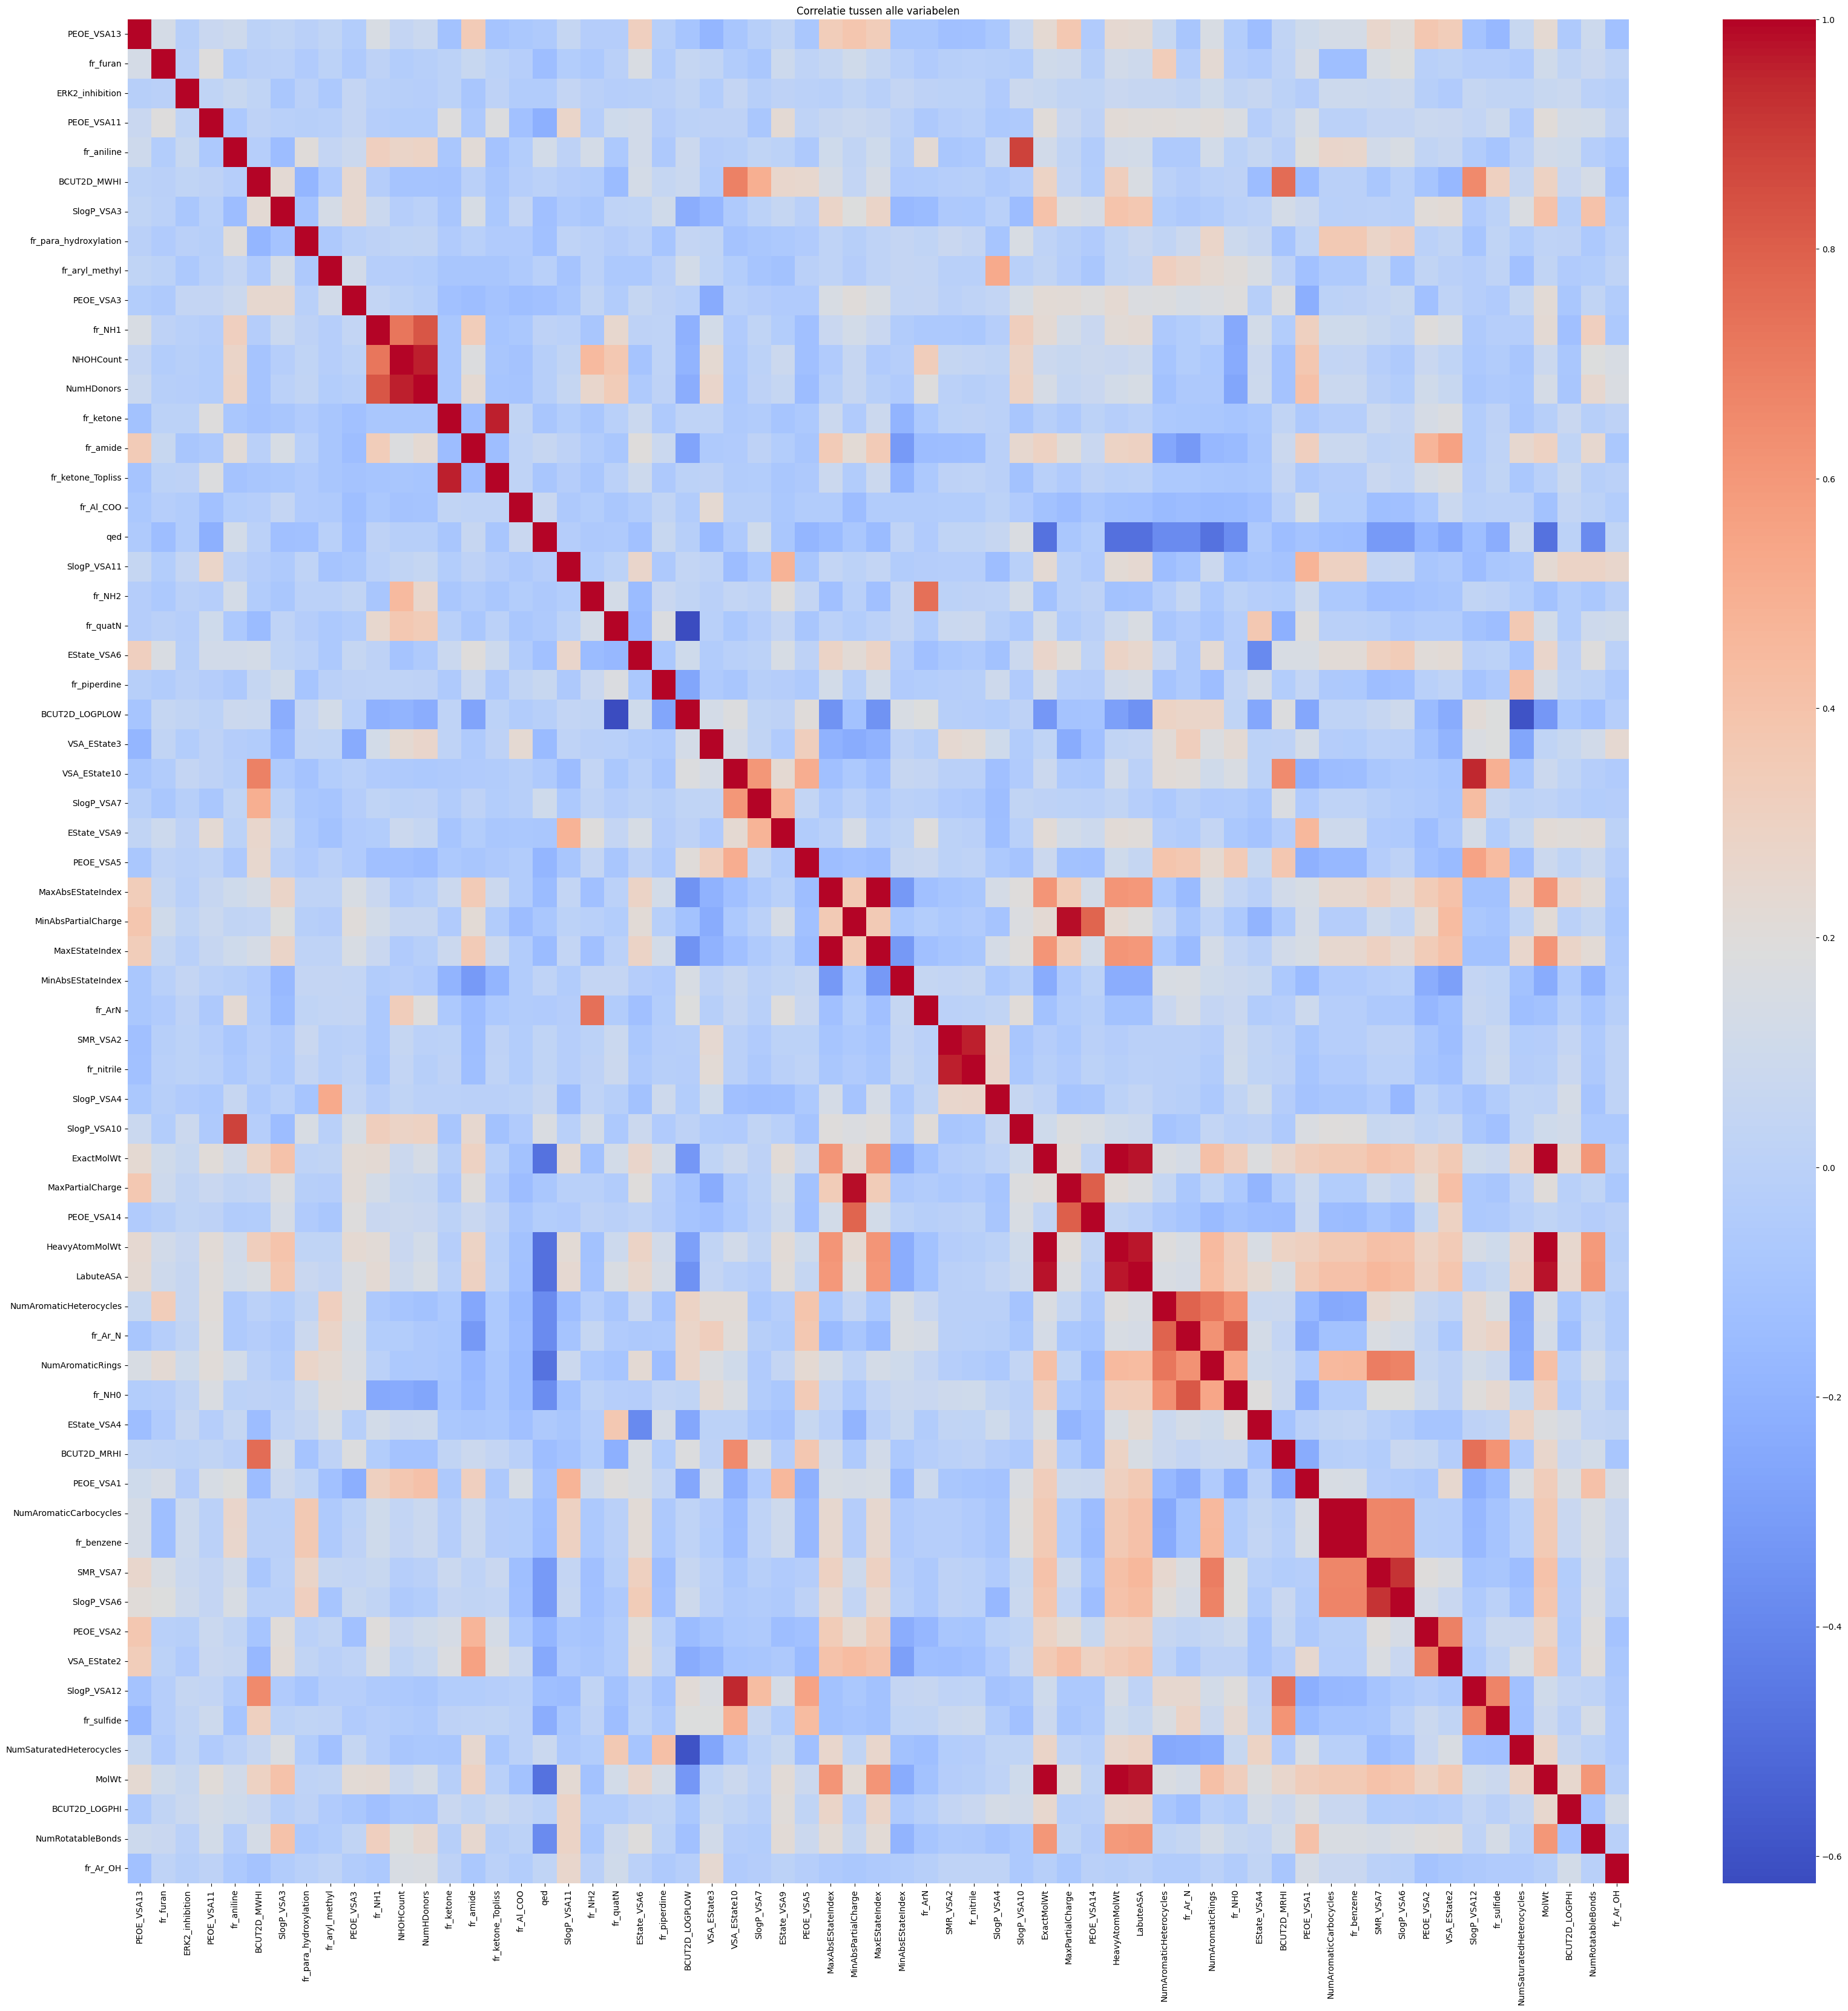

In [220]:
# No normality, so usage of spearman
correlation_matrix = new_df.iloc[:,1:].corr(method = 'spearman')

# Create the heatmap
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlatie tussen alle variabelen')
plt.show()

#gooedddddd!!! --> machine learning it is

In [221]:
# Filter the original DataFrame to include only the important features
df_67 = pd.DataFrame()
for column in important_features:
    df_67[column] = scaled_df[column]

In [222]:
# for index, row in data_raw.iterrows():
    
#     if row['PKM2_inhibition'] == 0 and row['ERK2_inhibition'] == 0:
#         data_raw.at[index, 'Inhibition'] = 0
        
#     elif row['PKM2_inhibition'] == 1 and row['ERK2_inhibition'] == 0:
#         data_raw.at[index, 'Inhibition'] = 1
        
#     elif row['PKM2_inhibition'] == 0 and row['ERK2_inhibition'] == 1:
#         data_raw.at[index, 'Inhibition'] = 2
        
#     elif row['PKM2_inhibition'] == 1 and row['ERK2_inhibition'] == 1:
#         data_raw.at[index, 'Inhibition'] = 3
        

# data_raw.tail(20)

# df_67['Inhibition'] = data_raw['Inhibition']
# df_67.tail()

In [223]:


# De variabelen worden gesplitst en toegekend aan een groep
X_gelijk = df_67.iloc[:, 1:].values # variabelen
y_gelijk = expanded_df['ERK2_inhibition'].values # wel/geen hartziekte

# De data worden gesplitst in een trainingsgroep en een testgroep
X_train, X_test, y_train, y_test = train_test_split(X_gelijk, y_gelijk, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, zero_division=1)  # Change zero_division

print(f'Confusion Matrix:\n{cm}')
print(f'Classification Report:\n{cr}')

Confusion Matrix:
[[208   0]
 [  0  16]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00        16

    accuracy                           1.00       224
   macro avg       1.00      1.00      1.00       224
weighted avg       1.00      1.00      1.00       224



In [224]:

# De variabelen worden gesplitst en toegekend aan een groep
X_gelijk = df_67.iloc[:, 1:].values # variabelen
y_gelijk = expanded_df['PKM2_inhibition'].values # wel/geen hartziekte

# De data worden gesplitst in een trainingsgroep en een testgroep
X_train, X_test, y_train, y_test = train_test_split(X_gelijk, y_gelijk, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, zero_division=1)  # Change zero_division

print(f'Confusion Matrix:\n{cm}')
print(f'Classification Report:\n{cr}')

Confusion Matrix:
[[218   0]
 [  6   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       218
           1       1.00      0.00      0.00         6

    accuracy                           0.97       224
   macro avg       0.99      0.50      0.49       224
weighted avg       0.97      0.97      0.96       224



In [225]:
# # df_67 = df_67.iloc[500:]

# X = df_67.drop('Inhibition', axis=1)  # Replace 'target_column' with your actual target column name
# y = df_67['Inhibition']

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train the Random Forest model
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)

# # Make predictions
# y_pred = rf.predict(X_test)

# # Evaluate the model
# cm = confusion_matrix(y_test, y_pred)
# cr = classification_report(y_test, y_pred, zero_division=1)  # Change zero_division

# print(f'Confusion Matrix:\n{cm}')
# print(f'Classification Report:\n{cr}')

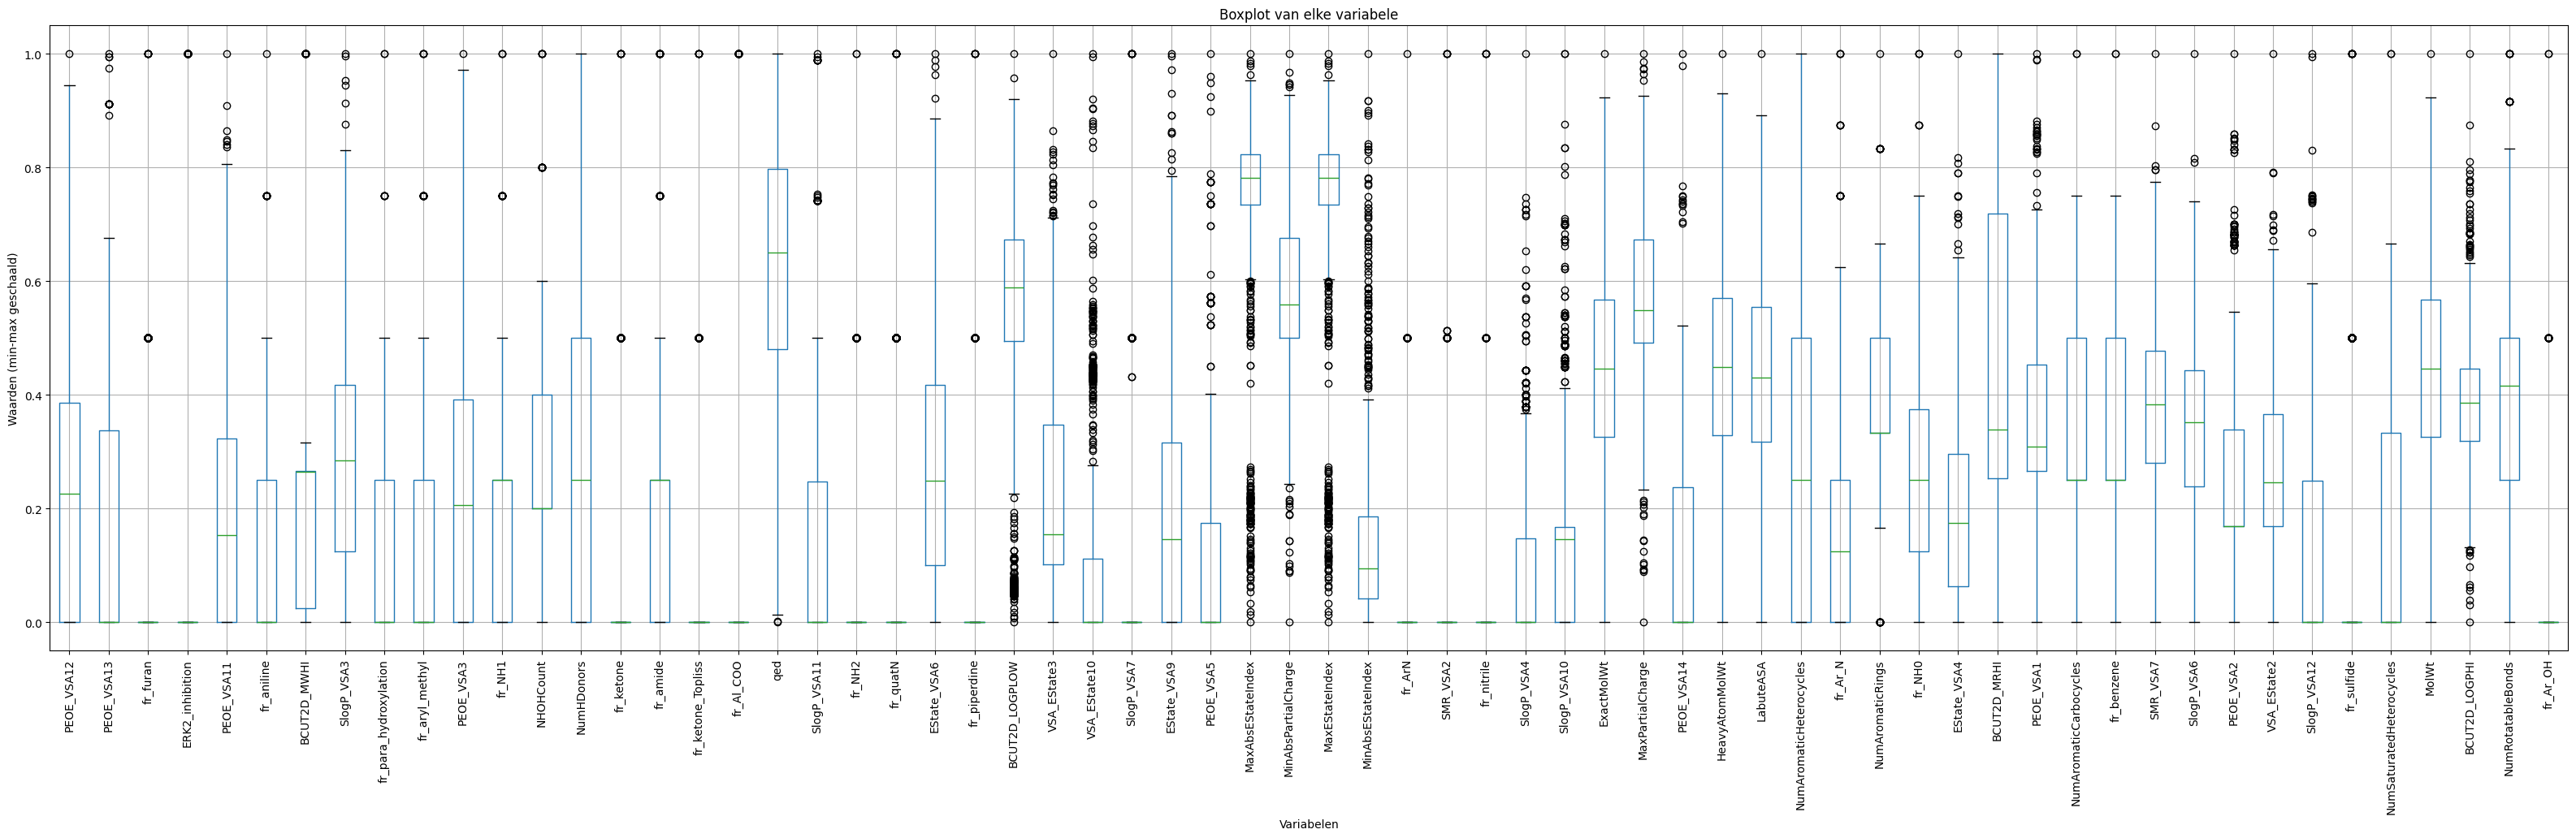

,PEOE_VSA12,PEOE_VSA13,fr_furan,ERK2_inhibition,PEOE_VSA11,fr_aniline,BCUT2D_MWHI,SlogP_VSA3,fr_para_hydroxylation,fr_aryl_methyl,...,SlogP_VSA6,PEOE_VSA2,VSA_EState2,SlogP_VSA12,fr_sulfide,NumSaturatedHeterocycles,MolWt,BCUT2D_LOGPHI,NumRotatableBonds,fr_Ar_OH
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,...,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,0.207689,0.194527,0.065412,0.045699,0.160573,0.160618,0.178747,0.290619,0.099686,0.132392,...,0.342970,0.252373,0.266745,0.130442,0.093638,0.136499,0.445427,0.388508,0.395684,0.017473
std,0.216655,0.233960,0.177741,0.208925,0.183022,0.189457,0.188027,0.194639,0.172290,0.192928,...,0.146052,0.189898,0.150370,0.180916,0.207407,0.195581,0.162877,0.114209,0.182851,0.096621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024208,0.124642,0.000000,0.000000,...,0.239592,0.169710,0.168414,0.000000,0.000000,0.000000,0.326547,0.319217,0.250000,0.000000
50%,0.226556,0.000000,0.000000,0.000000,0.153454,0.000000,0.264942,0.284455,0.000000,0.000000,...,0.351813,0.169710,0.245550,0.000000,0.000000,0.000000,0.446555,0.385880,0.416667,0.000000
75%,0.386198,0.337993,0.000000,0.000000,0.322656,0.250000,0.266477,0.417926,0.250000,0.250000,...,0.443800,0.339420,0.366792,0.249689,0.000000,0.333333,0.567130,0.445937,0.500000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [226]:
# plotten van min-max scaled values
plt.figure(figsize=(40, 10))
df_67.boxplot(rot=90)
plt.title('Boxplot van elke variabele')
plt.ylabel('Waarden (min-max geschaald)')
plt.xlabel('Variabelen')
plt.show()

df_67.describe()

# Voor numerieke kenmerken die continu zijn, behoud de schaal. Het is niet nodig om deze data te binariseren, 
# aangezien Random Forests hier goed mee kunnen omgaan. Daarom gaan wij mooie boxplots niet binair maken, maar vooral discrete variabelen binair maken.

In [227]:
## Logistic regression !!
from sklearn.linear_model import LogisticRegression
drempelwaarde = 0.25 #kies een drempelwaarde als kans voor wanneer het wordt gezien als heartdisease ook wordt gelabeld als heart disease 
log_reg = LogisticRegression() #logistische regressie benoemen als "log_reg"
log_reg.fit(X_train, y_train) #classsificator trainen

y_prob = log_reg.predict_proba(X_test)[:, 1] #voorspel de kans van de positieve groep in de testset
y_pred = (y_prob >= drempelwaarde).astype(int) #waarde van voorspelling gebaseerd op de toegepaste treshold

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, zero_division=1)  # Change zero_division

print(f'Confusion Matrix:\n{cm}')
print(f'Classification Report:\n{cr}')


Confusion Matrix:
[[218   0]
 [  6   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       218
           1       1.00      0.00      0.00         6

    accuracy                           0.97       224
   macro avg       0.99      0.50      0.49       224
weighted avg       0.97      0.97      0.96       224



In [228]:
from sklearn.tree import DecisionTreeClassifier
beslisboom = DecisionTreeClassifier() #beslisboom algoritme oproepen
beslisboom.fit(X_train, y_train) #classificator oproepen
y_pred = beslisboom.predict(X_test) #voorspelling


# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, zero_division=1)  # Change zero_division

print(f'Confusion Matrix:\n{cm}')
print(f'Classification Report:\n{cr}')

Confusion Matrix:
[[208  10]
 [  4   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       218
           1       0.17      0.33      0.22         6

    accuracy                           0.94       224
   macro avg       0.57      0.64      0.59       224
weighted avg       0.96      0.94      0.95       224

